In [3]:
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import sklearn 
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

In [4]:
pyo.init_notebook_mode(connected=True)                 #Initiate notebook for offline plot

cf.go_offline()                                        #Update to use cufflinks offline


In [5]:
heart = pd.read_csv('heart.csv')

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


#Note: For each column of heart.csv file we are specifying certain details/information like first column is age, in second column 1 is for male and 0 is for female,
# third column is of chest pain type in which 1 is for typical angina, 2 is for atypical angina, 3 is for non-anginal pain, 4 is for asymptomatic,
# fourth column is of resting blood pressure, fifth of serum cholestoral in mg/dl and so on and then storing this complete list in info variable.

for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

#Note: Here for each column of heart.csv file we have added the particular information from the info variable along with a ":" and 3 tabs
# and printed it.

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
heart['target']   

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
heart.groupby('target').size()                        #This function is displaying the total of unique elements 


target
0    138
1    165
dtype: int64

In [10]:
heart.groupby('target').sum()  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [11]:
heart.describe()      

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart['target'].unique()     

array([1, 0], dtype=int64)

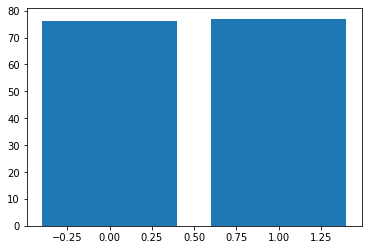

In [13]:
plt.bar(x=heart['sex'],height=heart['age'])                #This is plotting the bar graph in which sex is taken on x axis and age is taken as height

plt.show()


In [14]:
import seaborn as sns

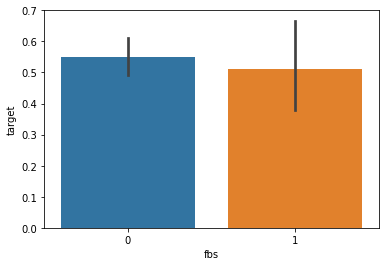

In [15]:

sns.barplot(x="fbs", y="target", data=heart)                  #This is again displaying the bar graph of fbs V/S target  
plt.show()

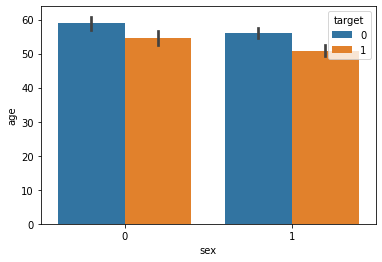

In [16]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])
#hue parameter determines which column in the data frame should be used for colour encoding.
#Here we took target column for color encoding.
plt.show()

C:\Users\Prayag Chawla\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



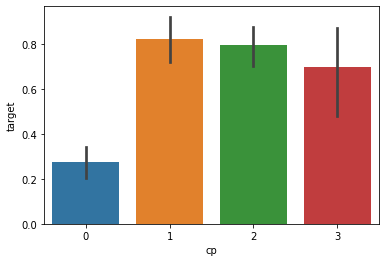

In [17]:
sns.barplot(heart["cp"],heart['target'])                #This is plotting the cp V/S target bar graph 
#From this we come to know that x,y,hue parameters are optional
plt.show()

In [18]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
x,y=heart.loc[:,:'thal'],heart.loc[:,'target']

In [20]:

print(x) 


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
x.shape

(303, 13)

In [24]:
y.shape   # 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1

(303,)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [25]:
Category = ['No....but I pray you will not get Heart Disease or at leaset Corona Virus Soon...', 'Yes you have Heart Disease, take care and proper treatment']

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [30]:
predictions = decision_tree.predict(x_test)


In [31]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [32]:
accuracy = accuracy_score(y_test, predictions)

In [33]:
accuracy * 100

74.72527472527473

In [34]:
predictions[0]

1

In [36]:
Category[predictions[0]]

'Yes you have Heart Disease, take care and proper treatment'